 # Analiza danych o wskaźnikach samobójstw w USA w podziale na płeć, rasę i grupy wiekowe (1950-2018)

# Wstęp

Samobójstwa są istotnym problemem zdrowia publicznego, wpływającym na miliony ludzi na całym świecie. Celem niniejszego raportu jest analiza długoterminowych trendów w zakresie wskaźników samobójstw w Stanach Zjednoczonych, z uwzględnieniem podziału na różne grupy wiekowe, płeć oraz rasę. Motywacją do przeprowadzenia tej analizy jest lepsze zrozumienie czynników wpływających na ryzyko samobójstwa oraz identyfikacja grup podwyższonego ryzyka, co może wspomóc tworzenie skuteczniejszych polityk prewencyjnych.

**Cele analizy:**

Zbadanie długoterminowych trendów wskaźników samobójstw w latach 2025-2027.

Analiza różnic w wskaźnikach samobójstw w zależności od płci, rasy oraz grupy wiekowej.


# Opis danych

**Pochodzenie danych**

Dane pochodzą z Krajowego Systemu Statystyki Żywotności (National Vital Statistics System - NVSS) oraz z Biura Spisu Ludności Stanów Zjednoczonych (U.S. Census Bureau).

**Źródła danych:**

Grove RD, Hetzel AM. "Vital statistics rates in the United States, 1940-1960."

NVSS annual public-use Mortality Files

Murphy SL, Xu JQ, Kochanek KD, Arias E, Tejada-Vera B. "Deaths: Final data for 2018."

https://www.kaggle.com/datasets/melissamonfared/death-rates-united-states

**Struktura zbioru danych**

| **Kolumna**       | **Typ danych** | **Unikalne wartości / Zakres**                                       | **Opis**                                                                                           | **Procent wartości**              |
|--------------------|----------------|------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|-----------------------------------|
| `INDICATOR`        | String         | 1 unikalna wartość: "Death rates for suicide"                          | Wskaźnik dotyczący śmiertelności samobójstw                                                       | 100%                              |
| `UNIT`             | String         | 2 wartości: "Deaths per 100,000 resident population, crude", "Deaths per 100,000 resident population, age-adjusted" | Typ jednostki miary                                                                                | 87% / 13%                         |
| `UNIT_NUM`          | Integer        | Wartości: 1 lub 2                                                      | Odpowiada jednostce z kolumny `UNIT`                                                              | 87% / 13%                         |
| `STUB_NAME`        | String         | "Sex, age and race", "Sex, age and race and Hispanic origin", Inne      | Kategoria obejmująca płeć, wiek, rasę i pochodzenie latynoskie oraz inne                          | 25% / 21% / 54%                   |
| `STUB_NAME_NUM`    | Integer        | Wartości: 0-11                                                         | Numeryczna reprezentacja kategorii `STUB_NAME`                                                     | 9% / 2% / 18% / 10% / 24% / 10% / 20% / 0.1% / 0.4% / 0.3% / 0.7% |
| `STUB_LABEL`       | String         | "Female: Black or African American", "Male: White", Inne                | Szczegółowe oznaczenie płci, wieku, rasy i pochodzenia latynoskiego                                | 1% / 1% / 97%                     |
| `STUB_LABEL_NUM`   | Float          | Wartości: 0-7.24                                                      | Numeryczna reprezentacja kategorii `STUB_LABEL`                                                    | 1% / 1% / 97%                     |
| `YEAR`             | Integer        | Zakres: 1950-2018                                                     | Rok, dla którego podano dane                                                                      | -                                 |
| `YEAR_NUM`         | Integer        | Wartości: 1-42                                                        | Numeryczna reprezentacja lat                                                                       | -                                 |
| `AGE`              | String         | "All ages", "15-24 years", Inne                                        | Wiek grupy, dla której podano dane                                                                | 25% / 13% / 62%                   |
| `AGE_NUM`          | Float        | Wartości: 0-6                                                         | Numeryczna reprezentacja grup wiekowych                                                           | - |
| `ESTIMATE`         | Float          | Zakres: 0.3 - 74.8                                                    | Szacowany wskaźnik śmiertelności                                                                  | -                                 |







# Wstępna analiza danych

Importowanie potrzebnych bibliotek

In [ ]:
import kagglehub #biblioteka z której pobieram dane
import pandas as pd #biblioteka do analizy danych i manipulacji danymi
import shutil #biblioteka do dostarczania funkcji do pracy z plikami i katalogami na poziomie systemu plików

In [ ]:
path = kagglehub.dataset_download("melissamonfared/death-rates-united-states")
print(path)

100%|██████████| 85.4k/85.4k [00:00<00:00, 30.1MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/melissamonfared/death-rates-united-states/versions/2


Przeniesienie plików do katalogu "content" w Colabie

In [ ]:
destination_path = "/content/death-rates-united-states"
shutil.copytree(path, destination_path)

'/content/death-rates-united-states'

Wczytanie danych do ramki danych (Data Frame)

In [ ]:
datafile = "/content/death-rates-united-states/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
df=pd.read_csv(datafile)

Podstawowa analiza danych, sprawdzenie podstawowych statystyk.

In [ ]:
print("Ogólna informacja o danych:")
print(df.info())

print("Nagłówek:")
print(df.head()) # Pierwszych 5 wierszy

print("Ogon:")
print(df.tail()) # Ostatnich 5 wierszy

Ogólna informacja o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 599.2+ KB
None
Nagłówek:
                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-ad.

In [ ]:
print("Prosty opis statystyczny danych:")
print(df.describe())

Prosty opis statystyczny danych:
          UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM         YEAR     YEAR_NUM  \
count  6390.000000    6390.000000     6390.000000  6390.000000  6390.000000   
mean      1.872926       4.621909        4.686775  1997.525822    22.692019   
std       0.333081       2.031777        1.829624    14.937451    12.286033   
min       1.000000       0.000000        0.000000  1950.000000     1.000000   
25%       2.000000       3.000000        3.230000  1988.000000    12.000000   
50%       2.000000       5.000000        5.125100  1999.000000    23.000000   
75%       2.000000       6.000000        6.153000  2009.000000    33.000000   
max       2.000000      11.000000        7.235000  2018.000000    42.000000   

           AGE_NUM     ESTIMATE  
count  6390.000000  5484.000000  
mean      2.712207    13.709810  
std       1.932280    11.531805  
min       0.000000     0.300000  
25%       0.000000     5.000000  
50%       3.000000    10.500000  
75%       4.10000

Zobaczmy jakie wartości z STUB_NAME_NUM odpowiadaja kategoriom z STUB_NAME

In [ ]:
unique_pairs = df.groupby('STUB_NAME')['STUB_NAME_NUM'].unique()

# Wyświetlenie wyników
for name, num in unique_pairs.items():
    print(f"{name}: {list(num)}")

Age: [1]
Sex: [2]
Sex and age: [3]
Sex and race: [4]
Sex and race (Single race): [8]
Sex and race and Hispanic origin: [6]
Sex and race and Hispanic origin (Single race): [10]
Sex, age and race: [5]
Sex, age and race (Single race): [9]
Sex, age and race and Hispanic origin: [7]
Sex, age and race and Hispanic origin (Single race): [11]
Total: [0]


To samo, ale z AGE i AGE_NUM

In [ ]:
unique_pairs = df.groupby('AGE')['AGE_NUM'].unique()

# Wyświetlenie wyników
for name, num in unique_pairs.items():
    print(f"{name}: {list(num)}")

10-14 years: [1.0]
15-19 years: [2.1]
15-24 years: [2.0]
20-24 years: [2.2]
25-34 years: [3.1]
25-44 years: [3.0]
35-44 years: [3.2]
45-54 years: [4.1]
45-64 years: [4.0]
55-64 years: [4.2]
65 years and over: [5.0]
65-74 years: [5.1]
75-84 years: [5.2]
85 years and over: [6.0]
All ages: [0.0]


# Przygotowywanie danych

Do modelu będziemy brali pod uwage płeć, rasę i wiek, więc wyciągamy z STUB_LABEL informacje o płci i rasie i tworzymy nowe kolumny.

In [ ]:
# Wyciągnięcie płci z kolumny STUB_LABEL
df['SEX'] = df['STUB_LABEL'].str.split(':').str[0]

# Filtrujemy tylko dane, które zawierają informacje o płci (Male, Female)
df = df[df['SEX'].isin(['Male', 'Female'])]

Wyciągamy z STUB_LABEL informacje o rasie

In [ ]:
import re # do manipulowanie tekstem na podstawie wzorców
#filtrujemy STUB_LABEL gdzie nie ma informacji o hiszpańskim pochodzeniu
df_filtered = df[df['STUB_NAME_NUM'].isin([4, 5, 8, 9])]
df_filtered['RACE'] = df_filtered['STUB_LABEL'].str.split(':').str[1]

def extract_race(label):
    # Wyciągamy tekst po "Not Hispanic or Latino" lub "Hispanic or Latino"
    match = re.search(r'Not Hispanic or Latino: ([^:]+)|Hispanic or Latino: ([^:]+)', label)
    if match:
        return match.group(1) if match.group(1) else match.group(2)
    return None
#filtrujemy STUB_LABEL tam gdzie są informacje o hiszpańskim pochodzeniu
df_filtered_next=df[df['STUB_NAME_NUM'].isin([6, 10, 7, 11])]
df_filtered_next['RACE'] = df_filtered_next['STUB_LABEL'].apply(extract_race)

# Połączenie wyników w głównym DataFrame
df.loc[df_filtered.index, 'RACE'] = df_filtered['RACE']
df.loc[df_filtered_next.index, 'RACE'] = df_filtered_next['RACE']


<ipython-input-10-af5d1fb4d7e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RACE'] = df_filtered['STUB_LABEL'].str.split(':').str[1]
<ipython-input-10-af5d1fb4d7e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_next['RACE'] = df_filtered_next['STUB_LABEL'].apply(extract_race)
<ipython-input-10-af5d1fb4d7e7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
print(df['RACE'].value_counts())
print(df.head())

RACE
 Black or African American                   653
 White                                       645
White                                        516
Black or African American                    516
All races                                    516
 American Indian or Alaska Native            508
 Asian or Pacific Islander                   504
American Indian or Alaska Native             252
Asian or Pacific Islander                    240
Asian                                         12
Native Hawaiian or Other Pacific Islander     12
Name: count, dtype: int64
                  INDICATOR  \
42  Death rates for suicide   
43  Death rates for suicide   
44  Death rates for suicide   
45  Death rates for suicide   
46  Death rates for suicide   

                                                 UNIT  UNIT_NUM STUB_NAME  \
42  Deaths per 100,000 resident population, age-ad...         1       Sex   
43  Deaths per 100,000 resident population, age-ad...         1       Sex   
44  Deaths p

Zauwazyłam, że dane się zduplikowały, przez spację przed niektórymi nazwami,  więc je teraz połączymy.

Kod do czyszczenia kolumny RACE

In [ ]:
# Usunięcie nadmiarowych spacji i standaryzacja wartości w kolumnie RACE
df['RACE'] = df['RACE'].str.strip().str.title()

# Standaryzacja wartości dla spójności
race_mapping = {
    "Asian Or Pacific Islander": "Asian or Pacific Islander",
    "Black Or African American": "Black or African American",
    "American Indian Or Alaska Native": "American Indian or Alaska Native",
    "White": "White",
    "All Races": "All races",
    "Native Hawaiian Or Other Pacific Islander": "Native Hawaiian or Other Pacific Islander",
}

df['RACE'] = df['RACE'].replace(race_mapping)

# Sprawdzenie unikalnych wartości w kolumnie RACE
print(df['RACE'].value_counts())


RACE
Black or African American                    1169
White                                        1161
American Indian or Alaska Native              760
Asian or Pacific Islander                     744
All races                                     516
Asian                                          12
Native Hawaiian or Other Pacific Islander      12
Name: count, dtype: int64


Usuwamy niepotrzebne kolumny

In [ ]:
df.drop(columns=['INDICATOR', 'UNIT', 'UNIT_NUM','STUB_NAME','STUB_NAME_NUM','STUB_LABEL','STUB_LABEL_NUM'], inplace=True)

Zmiana typu danych

In [ ]:
for col in [ 'AGE']:
    df[col] = df[col].astype('category')

In [ ]:
df['YEAR_NUM'] = df['YEAR_NUM'].astype('float')

In [ ]:
df['YEAR']=df['YEAR'].astype('float')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5718 entries, 42 to 6389
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   YEAR      5718 non-null   float64 
 1   YEAR_NUM  5718 non-null   float64 
 2   AGE       5718 non-null   category
 3   AGE_NUM   5718 non-null   float64 
 4   ESTIMATE  4812 non-null   float64 
 5   SEX       5718 non-null   object  
 6   RACE      4374 non-null   object  
dtypes: category(1), float64(4), object(2)
memory usage: 448.0+ KB
None


Kolumna RACE ma najmniej wartości, dlatego uzupełniamy brakujące rekordy wartością 'All races'.

In [ ]:
df['RACE'].fillna('All races', inplace=True)

<ipython-input-18-a59293231b24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RACE'].fillna('All races', inplace=True)


Widzimy, że columna ESTIMATE ma również mniej wartości niż inne, więc uzupełnim imputacją grupową

In [ ]:
df['ESTIMATE'] = df.groupby(['SEX', 'AGE'], observed=True)['ESTIMATE'].transform(lambda x: x.fillna(x.mean()))

Zamieniamy wartosci opisowe z kolumny SEX i RACE na numeryczne

In [ ]:
df=pd.get_dummies(data=df, drop_first=True, columns=['SEX', 'RACE'])

# Konwersja wszystkich kolumn typu bool na int
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [ ]:
print(df.head)

<bound method NDFrame.head of         YEAR  YEAR_NUM                AGE  AGE_NUM  ESTIMATE  SEX_Male  \
42    1950.0       1.0           All ages      0.0      21.2         1   
43    1960.0       2.0           All ages      0.0      20.0         1   
44    1970.0       3.0           All ages      0.0      19.8         1   
45    1980.0       4.0           All ages      0.0      19.9         1   
46    1981.0       5.0           All ages      0.0      19.8         1   
...      ...       ...                ...      ...       ...       ...   
6385  2018.0      42.0  65 years and over      5.0       1.3         0   
6386  2018.0      42.0        15-24 years      2.0       4.1         0   
6387  2018.0      42.0        25-44 years      3.0       4.4         0   
6388  2018.0      42.0        45-64 years      4.0       3.2         0   
6389  2018.0      42.0  65 years and over      5.0       1.6         0   

      RACE_American Indian or Alaska Native  RACE_Asian  \
42                    

In [ ]:
df['SEX'] = df['SEX_Male'] # 1 to mężczyzna, 0 to kobieta
df.drop(columns=['SEX_Male'], inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5718 entries, 42 to 6389
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   YEAR                                            5718 non-null   float64 
 1   YEAR_NUM                                        5718 non-null   float64 
 2   AGE                                             5718 non-null   category
 3   AGE_NUM                                         5718 non-null   float64 
 4   ESTIMATE                                        5718 non-null   float64 
 5   RACE_American Indian or Alaska Native           5718 non-null   int64   
 6   RACE_Asian                                      5718 non-null   int64   
 7   RACE_Asian or Pacific Islander                  5718 non-null   int64   
 8   RACE_Black or African American                  5718 non-null   int64   
 9   RACE_Native Hawaiian or Other Paci

Przed standaryzacjom zrobimy kopię

In [ ]:
df_copied = df.copy()

Sprawdźmy korelacje wartości ESTIMATE z innymi kolumnami numerycznymi

In [ ]:
# Wybór zmiennych numerycznych
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Obliczenie korelacji
correlation_matrix = df[numeric_columns].corr()

# Korelacja dla kolumny ESTIMATE
estimate_correlation = correlation_matrix['ESTIMATE'].sort_values(ascending=False)

# Wyświetlenie wyników
print("Korelacje z ESTIMATE:")
print(estimate_correlation)

Korelacje z ESTIMATE:
ESTIMATE                                          1.000000
SEX                                               0.683111
AGE_NUM                                           0.315715
RACE_White                                        0.232308
RACE_American Indian or Alaska Native             0.065304
RACE_Native Hawaiian or Other Pacific Islander    0.001749
RACE_Asian                                       -0.020097
YEAR                                             -0.035243
YEAR_NUM                                         -0.035299
RACE_Black or African American                   -0.128960
RACE_Asian or Pacific Islander                   -0.174790
Name: ESTIMATE, dtype: float64


Wartości bliskie 1 lub -1 wskazują na silną korelację (odpowiednio dodatnią lub ujemną).
Wartości bliskie 0 oznaczają brak korelacji.

Najsilniejsze korelacje:

SEX (0.6108):
Silna dodatnia korelacja z ESTIMATE. Oznacza to, że płeć ma największy wpływ na wartość ESTIMATE.

AGE_NUM (0.2813):
Średnia dodatnia korelacja. Wskazuje to, że wskaźnik samobójstw rośnie w miarę wzrostu grupy wiekowej.

 Korelacje ujemne:

YEAR_NUM (-0.0847) i YEAR (-0.0892):
Słabe ujemne korelacje sugerują, że ESTIMATE może mieć tendencję do spadku w miarę upływu czasu. Jednakże wpływ lat jest niewielki.


Standaryzacja danych

In [ ]:
from sklearn.preprocessing import StandardScaler #do standaryzacji

scalar=StandardScaler()
df[['AGE_NUM']]=scalar.fit_transform(df[['AGE_NUM']])


Nie standaryzujemy kolumn YEAR ani YEAR_NUM, gdyż chcemy aby one miały większy wpływ na predykcje w modelu

In [ ]:
df

,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,RACE_American Indian or Alaska Native,RACE_Asian,RACE_Asian or Pacific Islander,RACE_Black or African American,RACE_Native Hawaiian or Other Pacific Islander,RACE_White,SEX
42,1950.0,1.0,All ages,-1.369279,21.2,0,0,0,0,0,0,1
43,1960.0,2.0,All ages,-1.369279,20.0,0,0,0,0,0,0,1
44,1970.0,3.0,All ages,-1.369279,19.8,0,0,0,0,0,0,1
45,1980.0,4.0,All ages,-1.369279,19.9,0,0,0,0,0,0,1
46,1981.0,5.0,All ages,-1.369279,19.8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6385,2018.0,42.0,65 years and over,1.202403,1.3,0,0,0,1,0,0,0
6386,2018.0,42.0,15-24 years,-0.340606,4.1,0,0,0,0,0,0,0
6387,2018.0,42.0,25-44 years,0.173730,4.4,0,0,0,0,0,0,0
6388,2018.0,42.0,45-64 years,0.688067,3.2,0,0,0,0,0,0,0


# Wykresy

Importowanie biblioteki do wykresów

In [ ]:
import matplotlib.pyplot as plt #do wykresów

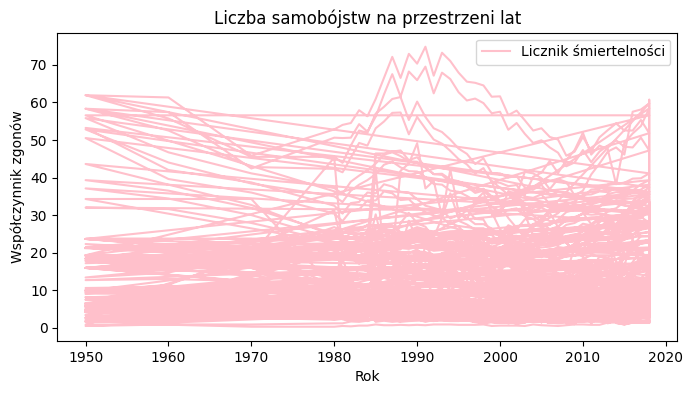

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df['YEAR'], df['ESTIMATE'], color='pink', label='Licznik śmiertelności')
plt.title('Liczba samobójstw na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Współczynnik zgonów')
plt.legend()
plt.show()

Wykres wygląda bardzo nieczytelnie, więc obliczamy średnie wartości wskaźnika śmiertelności

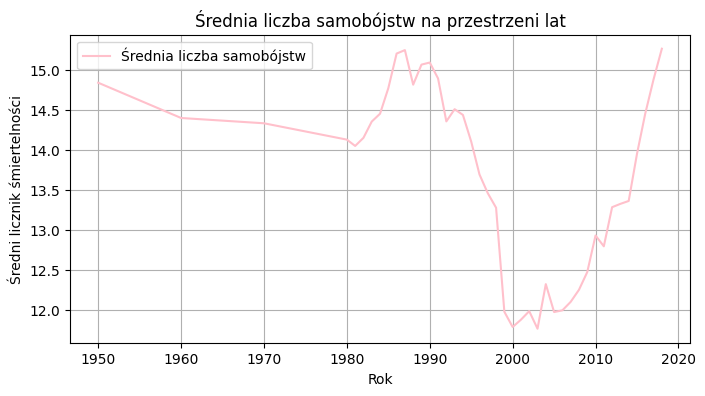

In [ ]:
df_mean = df.groupby('YEAR')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(df_mean['YEAR'], df_mean['ESTIMATE'],  color='pink', label='Średnia liczba samobójstw')

plt.title('Średnia liczba samobójstw na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()

Analiza pod względem wieku

<ipython-input-31-84201fdfc22b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = df.groupby(['YEAR', 'AGE'])['ESTIMATE'].mean().reset_index()


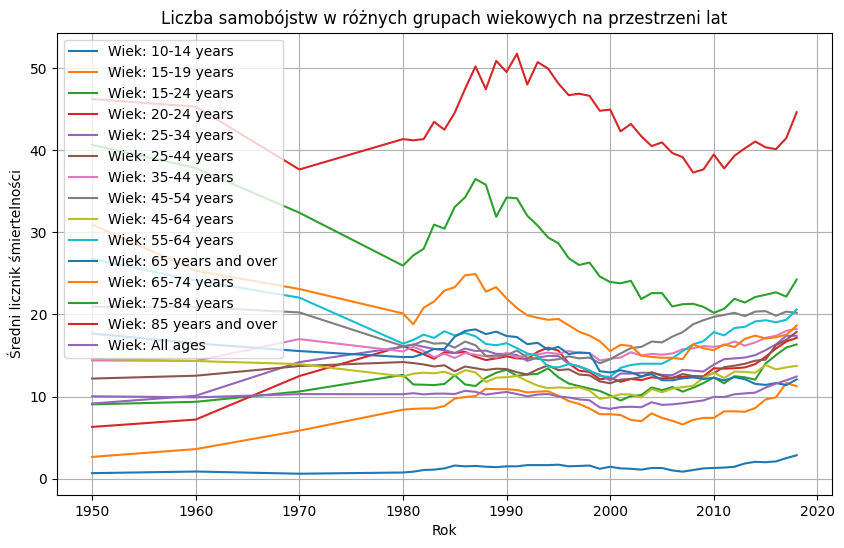

In [ ]:
df_age = df.groupby(['YEAR', 'AGE'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Iterowanie po każdej grupie wiekowej i tworzenie osobnych linii
for age_group in df_age['AGE'].unique():
    age_data = df_age[df_age['AGE'] == age_group]
    plt.plot(age_data['YEAR'], age_data['ESTIMATE'],  label=f'Wiek: {age_group}')

plt.title('Liczba samobójstw w różnych grupach wiekowych na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()


Zobaczmy jeszcze zależność od płci

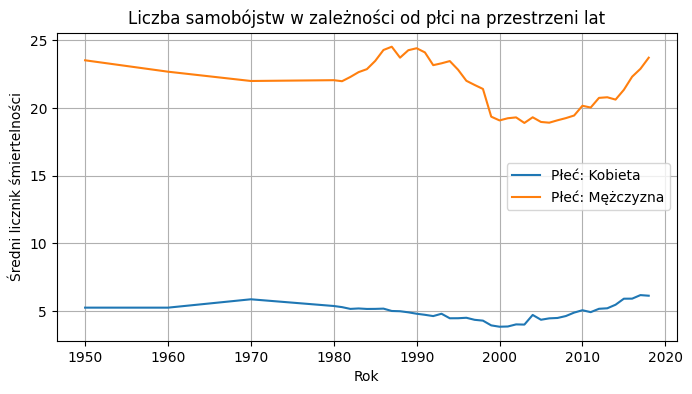

In [ ]:
df_sex = df.groupby(['YEAR', 'SEX'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(8, 4))

# Iterowanie po każdej płci i tworzenie osobnych linii
for sex_group in df_sex['SEX'].unique():
    sex_data = df_sex[df_sex['SEX'] == sex_group]
    # Dodajemy etykiety dla płci
    sex_label = 'Kobieta' if sex_group == 0 else 'Mężczyzna'
    plt.plot(sex_data['YEAR'], sex_data['ESTIMATE'],  label=f'Płeć: {sex_label}')

plt.title('Liczba samobójstw w zależności od płci na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()


Zależność od rasy

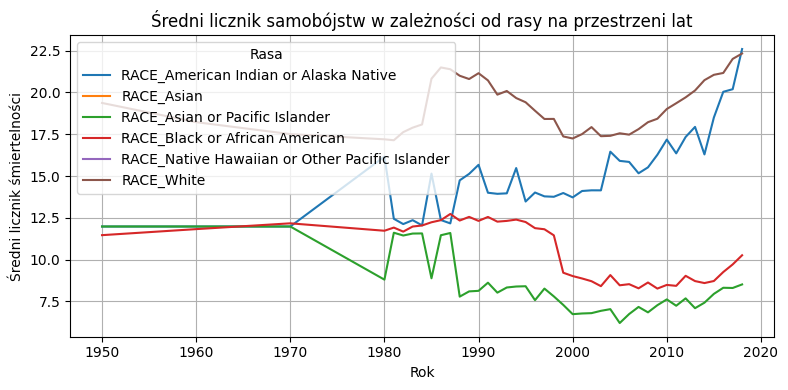

In [ ]:
race_columns = [col for col in df.columns if col.startswith('RACE')] #wybieramy wszystkie kolumny z rasą

df_race = df[['YEAR', 'ESTIMATE'] + race_columns]

df_race_grouped = pd.DataFrame()


for race in race_columns:
    # Tworzymy DataFrame dla konkretnej rasy
    race_data = df[['YEAR', 'ESTIMATE', race]].copy()
    race_data['RACE'] = race  # Dodajemy kolumnę z nazwą rasy
    race_data = race_data[race_data[race] == 1]  # Filtrujemy dane, gdzie rasa jest obecna (IsRace == 1)
    race_data = race_data.groupby(['YEAR', 'RACE'])['ESTIMATE'].mean().reset_index()  # Obliczamy średnią
    df_race_grouped = pd.concat([df_race_grouped, race_data], ignore_index=True)  # Łączymy wyniki

plt.figure(figsize=(8, 4))

for race in df_race_grouped['RACE'].unique():
    race_data = df_race_grouped[df_race_grouped['RACE'] == race]  # Filtracja danych dla konkretnej rasy
    plt.plot(race_data['YEAR'], race_data['ESTIMATE'], label=race)

plt.title('Średni licznik samobójstw w zależności od rasy na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend(title="Rasa")
plt.tight_layout()

plt.show()


Jestem ciekawa mojej grupy wiekowej, rasy i płci

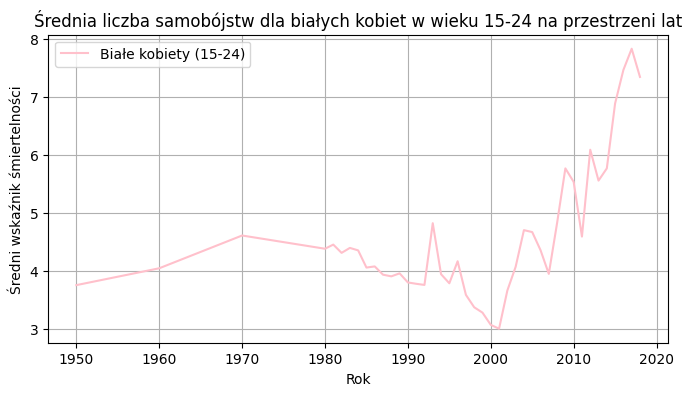

In [ ]:
# Filtrowanie danych dla białej kobiety w wieku 20-24 lat i 15-24
filtered_data = df[(df['SEX'] == 0) & (df['RACE_White'] == 0) & ((df['AGE'] == '20-24 years') | (df['AGE'] == '15-24 years'))]
yearly_mean = filtered_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(yearly_mean['YEAR'], yearly_mean['ESTIMATE'], color="pink", label='Białe kobiety (15-24)')

plt.title('Średnia liczba samobójstw dla białych kobiet w wieku 15-24 na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni wskaźnik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()


# Modele

Importowanie potrzebnych bibliotek

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

Tworzymy zależności miedzy cechami

In [ ]:
# Tworzenie dodatkowych cech
df['YEAR_AGE'] = df['YEAR_NUM'] * df['AGE_NUM']
df['SEX_YEAR'] = df['SEX'] * df['YEAR_NUM']
df['SQUARE_YEAR_NUM'] = df['YEAR_NUM']**2

# Zdefiniowanie cech i danych wyjściowych
feature_columns = ['YEAR_NUM','SQUARE_YEAR_NUM', 'YEAR_AGE','SEX_YEAR', 'AGE_NUM', 'SEX'] + race_columns
X = df[feature_columns].values
y = df['ESTIMATE'].values


Funkcja, dzięki której będziemy mogli w łatwiejszy sposób porównać różne modele

In [ ]:
def model_metrics(model, X, y, feature_names):
    # Podzielenie danych na dane testowe i treningowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # Predykcja modelu
    y_pred = model.predict(X_test)

    # Metryki
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Obliczanie ważności cech (jeśli dostępne)
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
        most_important_feature = feature_names[np.argmax(feature_importance)]

    return {
        "Model": model,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
    }

Te metryki zostały wybrane, ponieważ:

MSE (Mean Squared Error): mierzy średnią kwadratów różnic między rzeczywistymi a prognozowanymi wartościami, co sprawia, że jest wrażliwe na duże błędy, ponieważ błędy są podnoszone do kwadratu, a tym samym większe błędy mają większy wpływ na wynik.

RMSE (Root Mean Squared Error): jest pierwiastkiem kwadratowym z MSE, co czyni go łatwiejszym do interpretacji, ale wciąż odzwierciedla rozrzut błędów w modelu, umożliwiając porównanie z rzeczywistymi jednostkami danych.

MAE (Mean Absolute Error): oblicza średnią bezwzględną różnicę między wartościami rzeczywistymi a prognozami, nie uwzględniając znaku wartości. Jest to miara prostsza do zrozumienia i daje wynik niezależny od tego, czy wartości są dodatnie, czy ujemne.

R² (Współczynnik determinacji): ocenia, jaka część wariancji w danych jest wyjaśniona przez model. Mierzy, jak dobrze model pasuje do danych i nie zależy od tego, czy wartości są dodatnie, czy ujemne. Wyższe wartości R² wskazują na lepsze dopasowanie modelu.

In [ ]:
# Lista modeli do porównania
models = [
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42)),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(random_state=42))
]

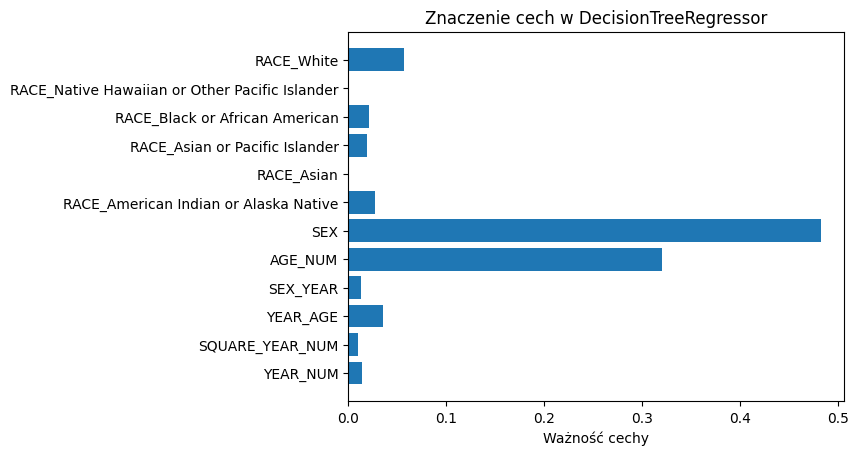

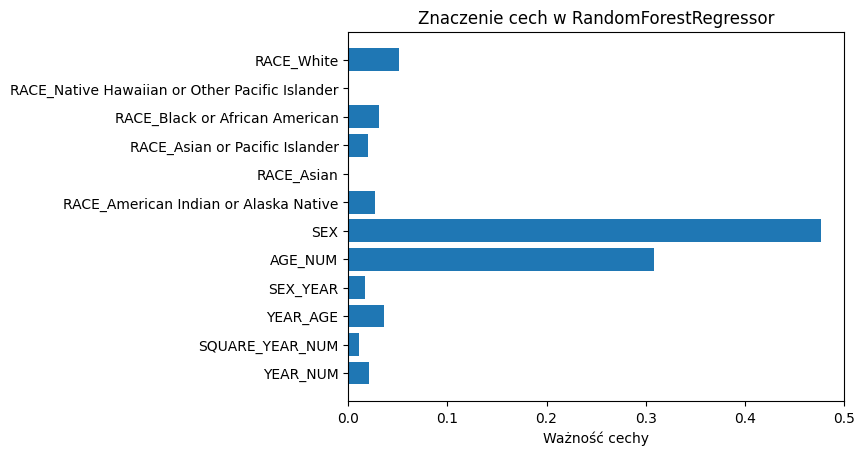

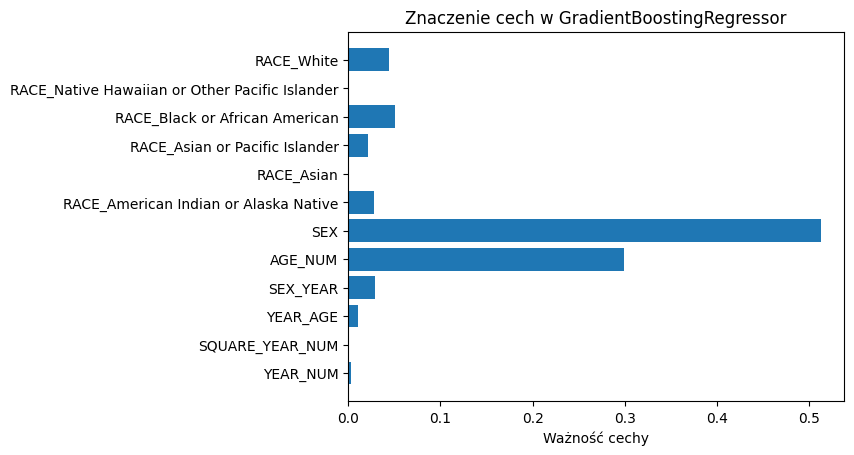

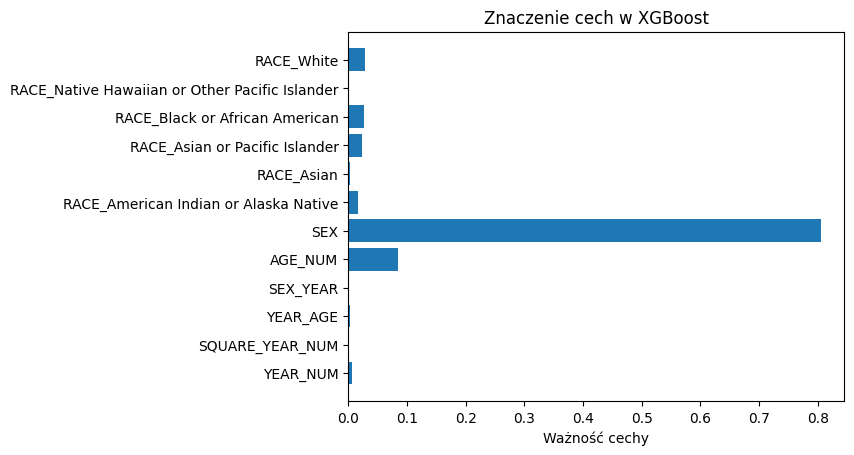

                       Model        MSE      RMSE       MAE        R²
0           LinearRegression  51.975018  7.209370  4.763045  0.634475
1      DecisionTreeRegressor  19.735079  4.442418  2.413038  0.861209
2      RandomForestRegressor  14.354925  3.788789  2.132926  0.899046
3  GradientBoostingRegressor  13.551046  3.681175  2.523647  0.904699
4                    XGBoost  11.923640  3.453062  2.007974  0.916145


In [ ]:
# Porównanie wyników
results = []

for model_name, model in models:
    metrics = model_metrics(model, X, y, feature_columns)
    mse = metrics['MSE']
    rmse = metrics['RMSE']
    mae = metrics['MAE']
    r2 = metrics['R2']

    results.append([model_name, mse, rmse, mae, r2])

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        plt.barh(feature_columns, importances)
        plt.xlabel("Ważność cechy")
        plt.title(f"Znaczenie cech w {model_name}")
        plt.show()

# Przekształcanie wyników do DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R²'])

# Wyświetlanie wyników
print(results_df)


Pomimo że model XGBoost osiągnął najlepsze wyniki, zdecydujemy się wybrać model RandomForestRegressor, ponieważ oferuje zadowalające rezultaty, a w przeciwieństwie do innych modeli szczególnie uwzględnia znaczenie zmiennych YEAR_NUM, co jest kluczowe dla naszej predykcji dotyczącej przyszłych lat.

# Wykorzystanie modelu RandomForestRegressor do predykcji

Spróbujemy go podrasować

In [ ]:
pom = model_metrics(RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
    ), X, y, feature_columns)
MODEL=pom['Model']
MSE=pom['MSE']
RMSE=pom["RMSE"]
MAE=pom['MAE']
R2=pom['R2']
print(MSE, RMSE, MAE, R2)

14.9769418399998 3.870005405680953 2.5439068156006717 0.8946715362828057


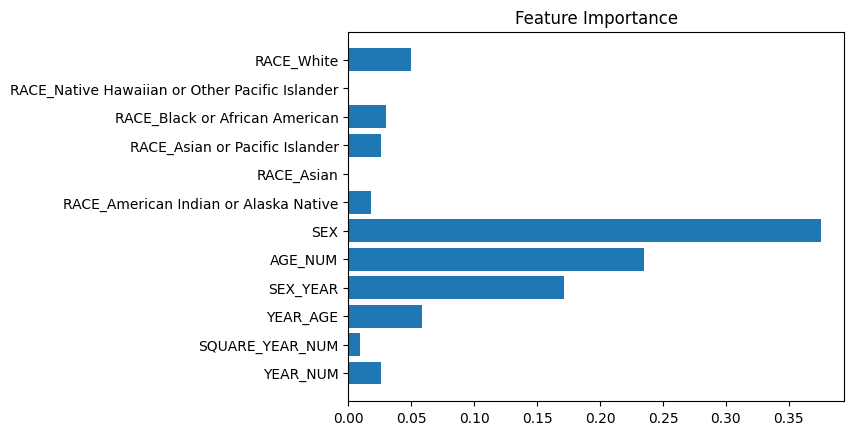

In [ ]:
importances = MODEL.feature_importances_
plt.barh(feature_columns, importances)
plt.title("Feature Importance")
plt.show()


Stworzmy funkcję która ułatwi nam wprowadzanie danych do modelu

In [ ]:
def predict_with_model(df, model, scalar, future_years_list, age_group, sex, race):
    # Mapa grup wiekowych na wartości numeryczne
    unique_age = df.groupby('AGE')['AGE_NUM'].unique()
    age_map = {age: num[0] for age, num in unique_age.items()}

    # Tworzenie mapy dla lat
    unique_years = df.groupby('YEAR')['YEAR_NUM'].unique()
    year_map = {year: num[0] for year, num in unique_years.items()}

    # Dodanie przyszłych lat do mapy
    current_max_year_num = max(year_map.values())
    for i, year in enumerate(future_years_list):
        year_map[year] = current_max_year_num + i + 1

    # Walidacja wejścia
    if age_group not in df['AGE'].unique():
        raise ValueError(f"Nieprawidłowa grupa wiekowa: {age_group}")
    if race not in race_columns:
        raise ValueError(f"Nieprawidłowa rasa: {race}")

    # Przygotowanie danych predykcyjnych
    future_years = pd.DataFrame({
        'YEAR': future_years_list,
        'AGE': [age_group] * len(future_years_list),
        'SEX': [sex] * len(future_years_list)
    })

    # Mapowanie lat na YEAR_NUM
    future_years['YEAR_NUM'] = future_years['YEAR'].map(year_map)
    future_years['AGE_NUM'] = future_years['AGE'].map(age_map)

    # Przygotowanie kolumn dla rasy
    for col in race_columns:
        future_years[col] = 0
    future_years[race] = 1

    future_years['YEAR_AGE'] = future_years['YEAR_NUM'] * future_years['AGE_NUM']
    future_years['SEX_YEAR'] = future_years['SEX'] * future_years['YEAR_NUM']
    future_years['SQUARE_YEAR_NUM']=future_years['YEAR_NUM']**2

    # Skalowanie danych
    scaled_features = scalar.transform(future_years[['AGE_NUM']])
    future_years[['AGE_NUM']] = scaled_features

    # Przygotowanie cech do przewidywań
    feature_columns = ['YEAR_NUM','SQUARE_YEAR_NUM', 'YEAR_AGE','SEX_YEAR','AGE_NUM', 'SEX'] + race_columns
    future_features = future_years[feature_columns]

    # Przewidywanie za pomocą modelu
    future_years['FINAL_ESTIMATE'] = model.predict(future_features)

    return future_years[['YEAR', 'FINAL_ESTIMATE']]

In [ ]:
list_of_years=list([2019,2020,2021,2022,2023,2024,2025, 2026, 2027])

Wybieramy rasę, grupę wiekową i płeć

In [ ]:
predictions_1 = predict_with_model(
    df=df,
    model=MODEL,
    scalar=scalar,
    future_years_list=list_of_years,
    age_group='15-24 years',
    sex=0,  # Female
    race='RACE_White'
)
print(predictions_1)


   YEAR  FINAL_ESTIMATE
0  2019        6.900649
1  2020        6.898057
2  2021        7.048918
3  2022        7.048961
4  2023       10.583145
5  2024       10.778845
6  2025       10.778845
7  2026       10.778845
8  2027       10.778845


<ipython-input-134-df4cfe206455>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_age = df.groupby('AGE')['AGE_NUM'].unique()
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Funkcja do rysowania wykresów

In [ ]:


def plot_historical_and_predicted(df, predictions, age_group, sex, race):
    """
    Tworzy wykres dla historycznych i przewidzianych danych.

    Parameters:
        df (DataFrame): DataFrame zawierający dane historyczne.
        predictions (DataFrame): DataFrame z przewidzianymi wartościami.
        age_group (str): Wybrana grupa wiekowa.
        sex (int): 0 dla kobiet, 1 dla mężczyzn.
        race (str): Wybrana rasa (np. 'RACE_White').
    """
    # Filtr danych historycznych
    historical_data = df[(df['AGE'] == age_group) & (df['SEX'] == sex) & (df[race] == 1)]
    historical_data = historical_data[['YEAR', 'ESTIMATE']].groupby('YEAR').mean().reset_index()

    # Przygotowanie danych do wykresu
    plt.figure(figsize=(10, 6))

    # Wykres danych historycznych
    plt.plot(
        historical_data['YEAR'],
        historical_data['ESTIMATE'],
        label='Historyczne dane',
        color='blue'
    )

    # Wykres przewidzianych danych
    plt.plot(
        predictions['YEAR'],
        predictions['FINAL_ESTIMATE'],
        label='Przewidziane dane',
        color='red'
    )

    # Ustawienia wykresu
    plt.title(f'Historyczne i przewidziane dane ({age_group}, {"Kobieta" if sex == 0 else "Mężczyzna"}, {race})')
    plt.xlabel('Rok')
    plt.ylabel('Współczynnik samobójstw')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


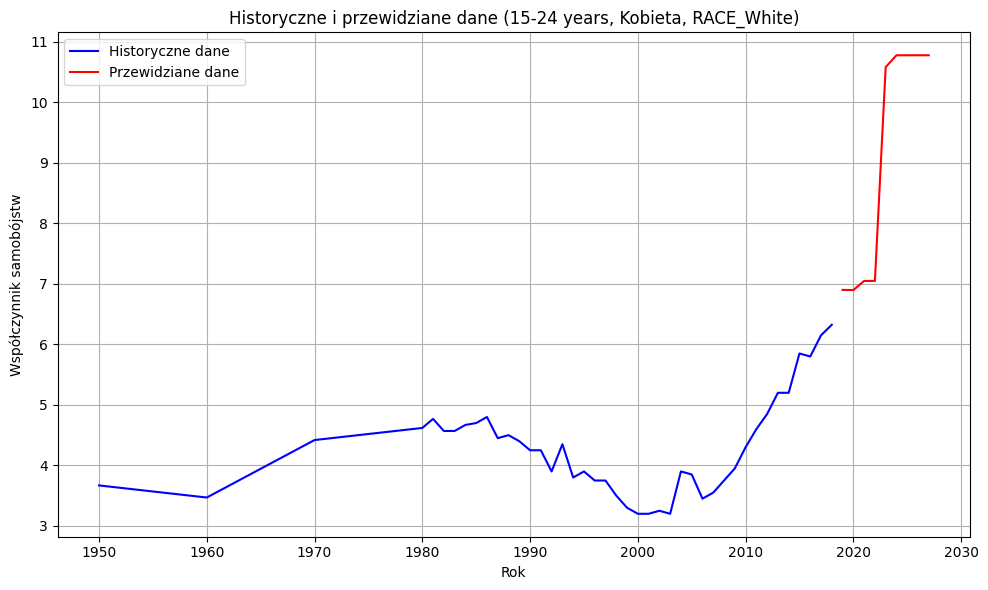

In [ ]:
plot_historical_and_predicted(
    df=df,
    predictions=predictions_1,
    age_group='15-24 years',
    sex=0,  # Female
    race='RACE_White'
)


In [ ]:
predictions_2 = predict_with_model(
    df=df,
    model=model,
    scalar=scalar,
    future_years_list=list_of_years,
    age_group='25-44 years',
    sex=1,
    race='RACE_Black or African American'
)

<ipython-input-134-df4cfe206455>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_age = df.groupby('AGE')['AGE_NUM'].unique()


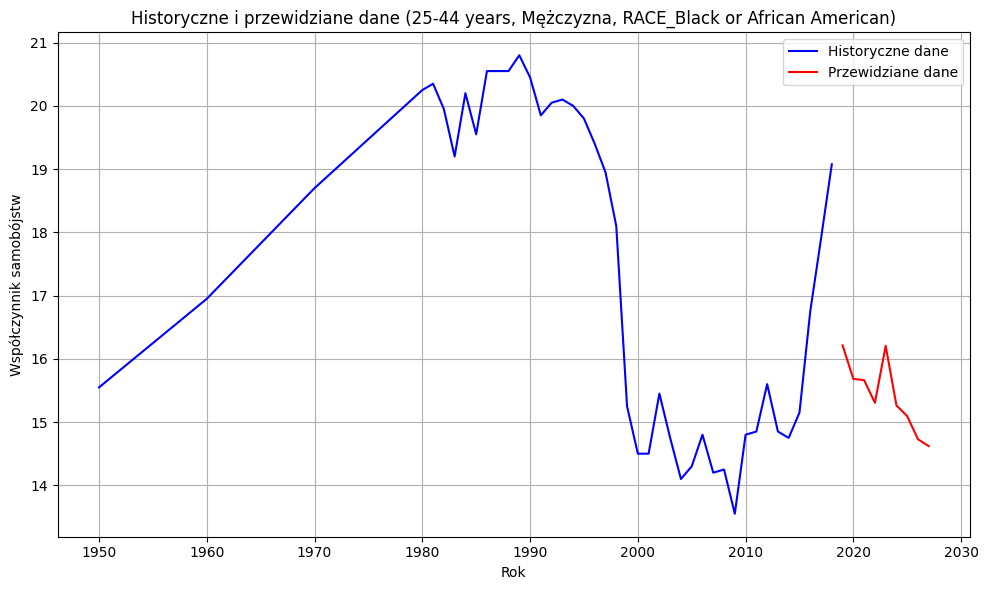

In [ ]:
plot_historical_and_predicted(
    df=df,
    predictions=predictions_2,
    age_group='25-44 years',
    sex=1,
    race='RACE_Black or African American'
)


# Wnioski

Dane historyczne

Wskaźnik samobójstw różni się znacząco między grupami demograficznymi:
Widać wyraźne różnice między grupami wiekowymi, rasami i płciami.
Historyczne dane pokazują zmienność trendów w czasie – dla niektórych grup widoczny jest wzrost, a dla innych spadek w długim okresie.


Modele predykcyjne
Modele użyte do przewidywania:

Linear Regression: dla danych z wyraźnym liniowym trendem.
RandomForestRegressor: wybrany jako główny model predykcyjny dzięki dobrej wydajności i zdolności uwzględniania złożonych wzorców.
GradientBoostingRegressor oraz XGBoost również dawały dobre wyniki, ale Random Forest został uznany za wystarczający pod względem prostoty i skuteczności.

Metryki ewaluacyjne:

Główne wskaźniki używane do oceny modeli to: MSE (Mean Squared Error), RMSE (Root Mean Squared Error), MAE (Mean Absolute Error) oraz R² (współczynnik determinacji).
Model Random Forest osiągnął zadowalające wyniki, z uwzględnieniem kluczowych cech takich jak rok, wiek oraz interakcje między płcią i rasą.

Wykresy i przewidywania

Wnioski z wykresów:
Grupa: 15-24 lata, kobiety, rasa biała (White):
Historyczne dane pokazują wzrost wskaźnika samobójstw od roku 2000.
Przewidywania na lata 2024-2027 wskazują na dalszy wzrost, co może wymagać interwencji.

Grupa: 25-44 lata, mężczyźni, rasa czarna (Black or African American):
Po okresie niestabilności i spadków wskaźnika samobójstw w latach 90. i 2000., dane przewidują stabilizację lub delikatny spadek.

Analiza czynników wpływających

Najsilniejsze korelacje z wskaźnikiem samobójstw:
Płeć (0.61): płeć ma największy wpływ na predykcję wskaźnika.
Wiek (0.28): wyższy wiek jest umiarkowanie skorelowany z wyższym wskaźnikiem samobójstw.
Rok (-0.08): trend czasowy jest słabo skorelowany z ogólnym wskaźnikiem, co wskazuje na złożone zależności.

